In [31]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use("ggplot")

In [32]:
tickers = ["BAC", "TSLA"]
start = dt.datetime(2014,1,1)
end = dt.datetime(2020,11,20)
number_of_portfolios = 5
RF = 0
returns = pd.DataFrame()
for ticker in tickers:
    data = web.DataReader(ticker, "yahoo", start, end)
    data = pd.DataFrame(data)
    data[ticker] = data["Adj Close"].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how="outer")

        
portfolio_returns = []
portfolio_risk = []
porfolio_ratio = []
portfolio_weights = []
    
for potfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(ticker))
    weights = np.round((weights / np.sum(weights)),3)
    portfolio_weights.append(weights)
    #calculate annualized returns
    #annualized_return = np.sum(returns.mean() * weights) ** 252
    #portfolio_returns.append(annualized_return)
    #matrix covariance & portfolio risk calcualtion
    matrix_covariance = returns.cov() * 252
    portfolio_variance = np.dot(weights.T,
                                np.dot(matrix_covariance, weights))
    #portfolio_risk.append(portfolio_standard_deviation)
    #sharpe ratio
    sharpe_ratio = annualized_return - RF / portfolio_standard_daviation
    sharpe_ratio.append(sharpe_ratios, weights)
    
    

ValueError: shapes (2,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

In [ ]:
    
#portfolio_returns = np.array(porfolio_returns)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratios = np.array(sharpe_ratios)


porfolio_metrics = [porfolio_returns, portfolio_risk,
sharpe_ratios, weights]

In [ ]:
print(weights)


In [ ]:
###new 

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
assets = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
pf_data = pd.DataFrame()
for x in assets:
    pf_data[x] = wb.DataReader(x, data_source = 'yahoo', start = '2015-1-1')['Adj Close']

<AxesSubplot:xlabel='Date'>

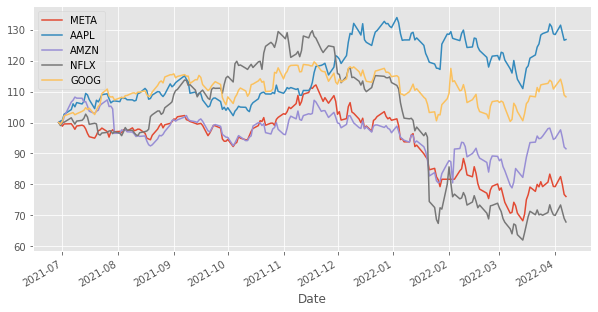

In [35]:
(pf_data / pf_data.iloc[0]*100).plot(figsize=(10,5))

In [36]:
#To get the logarithmic return of the assets:
log_returns = np.log(pf_data/pf_data.shift(1))

In [37]:
#To find the returns of both assets over the time period 
#(assuming 250 trading days in a year).
log_returns.mean() * 250


META   -0.348177
AAPL    0.302881
AMZN   -0.113046
NFLX   -0.494133
GOOG    0.101581
dtype: float64

In [38]:
#To get the covariance between the 2 assets:
log_returns.cov() * 250

,META,AAPL,AMZN,NFLX,GOOG
META,0.093068,0.050198,0.061210,0.071951,0.053510
AAPL,0.050198,0.062474,0.045639,0.043771,0.043272
AMZN,0.061210,0.045639,0.114921,0.076764,0.052387
NFLX,0.071951,0.043771,0.076764,0.207167,0.049619
GOOG,0.053510,0.043272,0.052387,0.049619,0.068803


Text(0, 0.5, 'Expected Return')

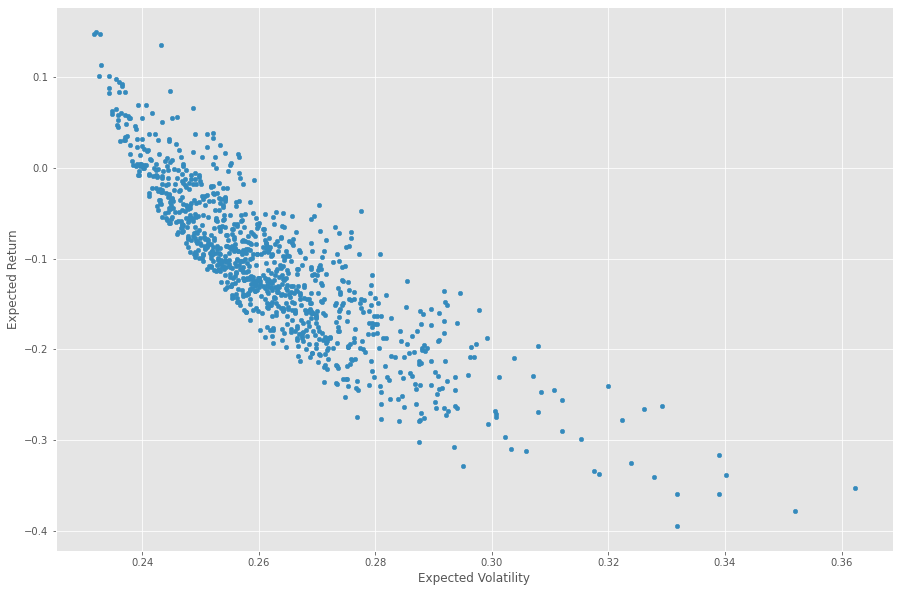

In [39]:
#To get the correlation between Twitter and AMD.
log_returns.corr()

#Here we are creating a 1000 different portfolio variations with the same 2 assets

portfolio_returns = []
portfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
                                  


np.sum(weights * log_returns.mean()) * 250

np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
